In [1]:
import cv2
import numpy as np
import pandas as pd
import malko_fly as mf
import matplotlib.pyplot as plt

mf.pb.cMapNotSym = mf.pb.plt.cm.viridis_r
mf.pb.cMapSym = mf.pb.plt.cm.PuOr_r

In [9]:
nPosts = 2
dVal = 0.8    # distance cutoff to filter trajectories that end too far from the posts

dataDIR = '/media/user/Samsung_T3/Work/Documents/Data/flyVR/new_experiments/'
dbDIR = '/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/dbGen/'

folders = ['']#['multi_post_sleep_fast', 'multi_post_sleep_med', 'multi_post_fast', 'multi_post_slow']

In [10]:
class MalkoFly:
    def __init__(self, dataDIR, projectDB, expDB, nPosts, dVal):
        self.dataDIR = dataDIR
        self.projectDB = projectDB
        self.expDB = expDB
        self.nPosts = nPosts
        self.dVal = dVal
    def __call__(self):
        df, fetched, angles = self.preprocessData()
        #df = self.distanceFilter(df)
        return df, self.getArchitechture(df, fetched, angles)
    def preprocessData(self):
        return mf.preprocess_fly_data(self.dataDIR, self.projectDB, self.expDB, self.nPosts)
    def distanceFilter(self, df):
        return mf.distance_filter_trajectories(self.dVal, self.nPosts, df)
    def getArchitechture(self, df, fetched, angles):
        return mf.get_malko_architecture(self.projectDB, self.expDB, self.nPosts, df, fetched, angles)

In [ ]:
all_experiments = mf.swarm.Swarm()
for i in range(0,len(folders)):
    projectDB = dbDIR + folders[i] + '/flyProjects.db'
    expDB = dbDIR + folders[i] + '/flyExperiments.db'
    
    malkofly = MalkoFly(dataDIR, projectDB, expDB, nPosts, dVal)
    df, massive_experiment = malkofly()
    all_experiments.addFish(massive_experiment)

fetched : [('7b035fd1-bf5d-4b17-b07b-fdce31c00174',), ('0cac2ffa-751c-47e2-a60c-a4394f0c3694',), ('730e9871-40e2-49f2-951e-64ee4c6a264b',), ('14aa360d-a93c-4c1c-bfa4-fe3d46fea4fe',), ('ae62bd32-c787-4ace-af5e-5602fd41c6de',), ('7b78ebae-f5d9-45b1-8a06-64ef4ac1be26',), ('32b3e6c4-0254-4a34-a89f-b4511f867a43',), ('be8d0ed4-cb4d-4be1-9197-ed3070a2d6c0',), ('02729761-34f5-47d3-853d-24d44b95e01a',), ('e5009561-0dc8-45a3-80d9-e23619ae9f63',), ('766cebfa-ec3a-45ae-bee8-c45b9af7e890',), ('811f4e3f-e84a-44fa-9aa2-c4cc5452b6b1',), ('b3122f45-b25b-49ab-994f-de87d61cd420',), ('38940006-4529-46a0-a368-e732cd684c29',), ('e02e2fb4-c50e-4d72-bd5e-f64e24bd718c',), ('4bc09102-9e80-4b75-9162-bfe947b89847',), ('4c934967-64bd-421e-9f00-cc017df1d6cd',), ('a7df1714-2578-469d-afc2-712db8adeac0',), ('d8794167-49af-44a7-8ade-cbe6dafcd718',), ('85e8dae9-3b21-42bb-8d27-b57d411cb94c',), ('eb518d61-f816-488f-98d0-400a5d6778b6',), ('a9ffea1b-5e11-4026-ae8c-3b6e13d52619',), ('33993c50-c962-4e8f-8142-ae85cb2079b1',), 

/mnt/ssd1/Documents/Vivek/MalkoFish/MalkoAnalyzer/plotBox.py:187: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(yTab,xTab,kTab, projection = projection,aspect=aspect)


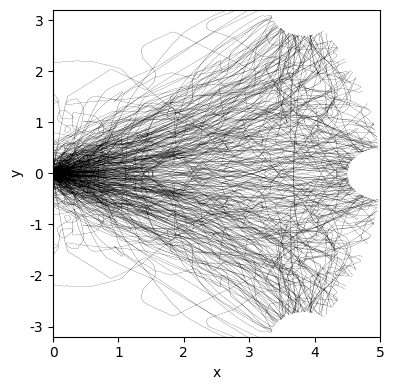

In [8]:
fig=[]

fig, ax = mf.pb.plot(all_experiments.get((0,1,)).metaFish['x'][:,0], 
                     all_experiments.get((0,1,)).metaFish['x'][:,1],
                     fig = fig, xlim=(0,5), ylim=(-3.2,3.2), figSize=(4,4),
                     markers = True, markerSize = 1, alpha = 0.01)

ax.set_xticks([0,1,2,3,4,5])
ax.set_yticks([-3,-2,-1,0,1,2,3])
ax.set_xticklabels([0,1,2,3,4,5])
ax.set_yticklabels([-3,-2,-1,0,1,2,3])

mf.pb.plt.savefig('/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/trajectory_' + str(nPosts) + '.png', format='png', dpi=300)

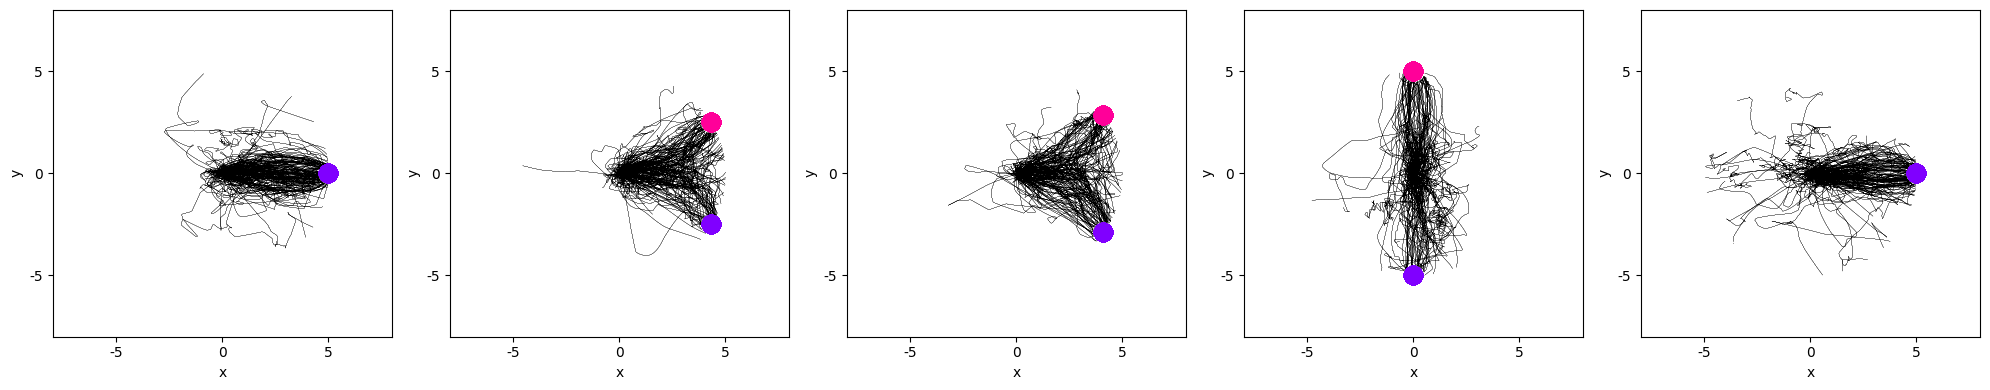

In [52]:
xTab = 5
yTab = len(folders)
fig = []
for y in range(0, yTab):
    for x in range(0, xTab):
        k = xTab*y + (x+1)
        fig, ax = mf.pb.plot(all_experiments.get((y,x,)).metaFish['x'][:,0], 
                             all_experiments.get((y,x,)).metaFish['x'][:,1],
                             fig = fig, xTab = xTab, yTab = yTab, kTab = k, xlim=(-8,8), ylim=(-8,8),
                             figSize = (4*xTab,4*yTab), markers = True, markerSize = 1, alpha = 0.01)
        fig, ax = mf.pb.plot(all_experiments.get((y,x,0,0,1)).var['x'][:,0], 
                             all_experiments.get((y,x,0,0,1)).var['x'][:,1],
                             fig = fig, xTab = xTab, yTab = yTab, kTab = k, ax = ax, 
                             ids = 0, markers = True, markerSize = 14, hold = True)
        if x != 0 and x != xTab-1:
            fig, ax = mf.pb.plot(all_experiments.get((y,x,0,0,2)).var['x'][:,0], 
                                 all_experiments.get((y,x,0,0,2)).var['x'][:,1],
                                 fig = fig, xTab = xTab, yTab = yTab, kTab = k, ax = ax, 
                                 ids = 1, markers = True, markerSize = 14, hold=True)
            if nPosts == 3:
                fig, ax = mf.pb.plot(all_experiments.get((y,x,0,0,3)).var['x'][:,0], 
                                     all_experiments.get((y,x,0,0,3)).var['x'][:,1],
                                     fig = fig, xTab = xTab, yTab = yTab, kTab = k, ax = ax, 
                                     ids = 2, markers = True, markerSize = 14, hold = True)

#mf.pb.plt.savefig('/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/trajectories_' + str(nPosts) + '.png', format='png', dpi=300)

findfont: Font family ['Glacial Indifference'] not found. Falling back to DejaVu Sans.


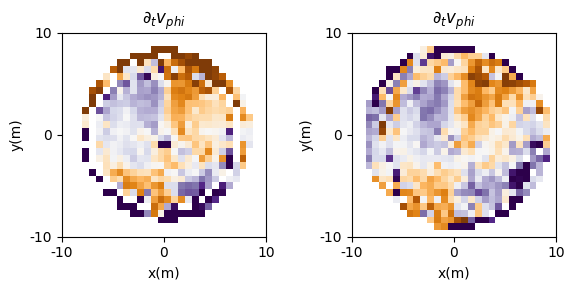

In [6]:
xTab = 2
yTab = len(folders)
plotK = 5
fig = []

fig = mf.plotter.FigureKatz(all_experiments.get((y,0,)).metaFish, 
                         all_experiments.get((y,0,)).metaFishRef,
                         beats = False, lrPlot = False, fbPlot = False, rzPlot = False, noTitle = False, 
                         plotK = plotK, fig = fig, xTab = xTab, yTab = yTab, kTab = 1)

fig = mf.plotter.FigureKatz(all_experiments.get((y,4,)).metaFish, 
                         all_experiments.get((y,4,)).metaFishRef,
                         beats = False, lrPlot = False, fbPlot = False, rzPlot = False, noTitle = False, 
                         plotK = plotK, fig = fig, xTab = xTab, yTab = yTab, kTab = 2)

#mf.pb.plt.savefig('/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/controls_' + str(nPosts) + '.png', format='png', dpi=300)

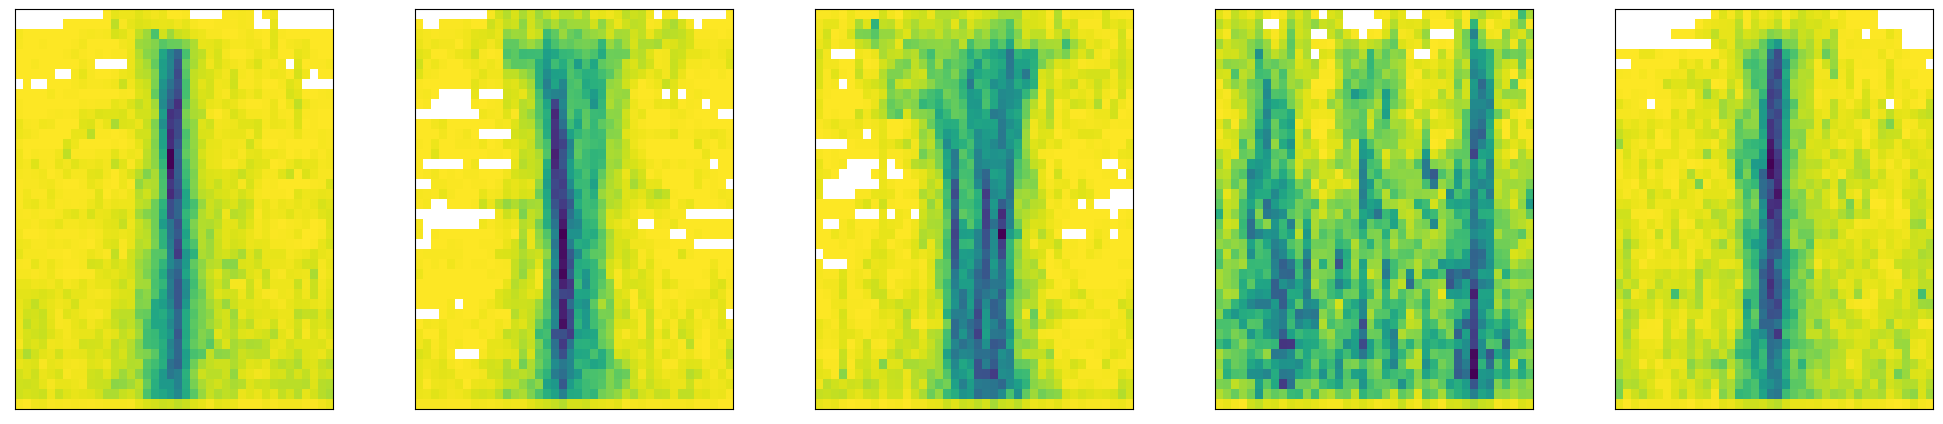

In [7]:
xTab = 5
yTab = len(folders)
fig = []
for y in range(0, yTab):
    for x in range(0, xTab):
        k = xTab*y + (x+1)
        idx = np.where(all_experiments.get((y,x,)).metaFish['r'][:,0] > 0.1)     # avoid bright spot at (0,0)
        fig = mf.pb.katzPlot(all_experiments.get((y,x,)).metaFish['r'][idx,0], 
                             all_experiments.get((y,x,)).metaFish['vr'][idx,1],
                             fig = fig, xTab = xTab, yTab = yTab, kTab = k, xlim=(0,5), ylim=(-np.pi,np.pi),
                             figSize = (4*xTab,4*yTab), noTicks=True, noSpace=True)
        
#mf.pb.plt.savefig('/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/katz_polar_plots_' + str(nPosts) + '.png', format='png', dpi=300)

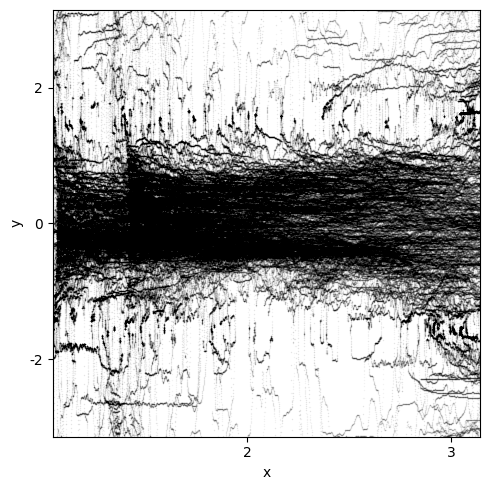

In [8]:
xTab = 5
y = 0
fig = []
ax = []
app_ang = []
direc = []

for x in range(1, xTab-1):
    idx = np.where(all_experiments.get((y,x,)).metaFish['r'][:,0] > 0.1)     # avoid bright spot at (0,0)
    hold = False if ax == [] else True

    xs = np.squeeze(-2*np.arctan2(np.unique(all_experiments.get((y,x,0,0,1)).var['x'][:,1])[0], 
                                  np.unique(all_experiments.get((y,x,0,0,1)).var['x'][:,0])[0] - all_experiments.get((y,x,)).metaFish['x'][idx,0]))
    ys = np.squeeze(all_experiments.get((y,x,)).metaFish['vr'][idx,1])
    app_ang = xs if x == 1 else np.concatenate((app_ang, xs), axis=0)
    direc = ys if x == 1 else np.concatenate((direc, ys), axis=0)

    fig, ax = mf.pb.plot(xs, ys, fig = fig, ax = ax, xlim = (np.pi/3,np.pi), markers = True, 
                         markerSize = 1, alpha = 0.05, hold = hold)
    
#mf.pb.plt.savefig('/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/dir_vs_apparent_ang' + str(nPosts) + '.png', format='png', dpi=300)

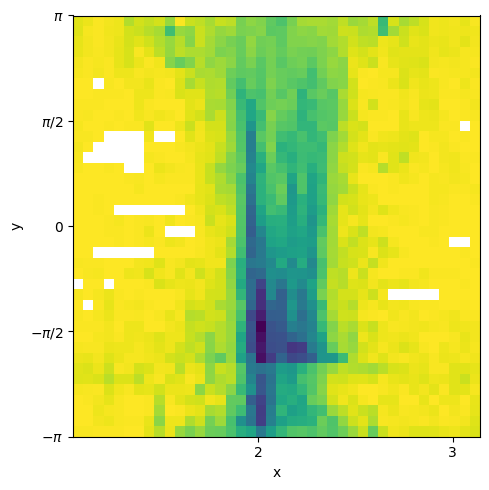

In [9]:
fig = mf.pb.katzPlot(app_ang, direc, xlim=(np.pi/3,np.pi), ylim=(-np.pi,np.pi), aspect='auto')
#mf.pb.plt.savefig('/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/katz_dir_vs_apparent_ang_' + str(nPosts) + '.png', format='png', dpi=300)

In [10]:
if nPosts == 2:
    xs = all_experiments.get((0,1,)).metaFish['x'][:,0]
    ys = all_experiments.get((0,1,)).metaFish['x'][:,1]

    post0_x = np.unique(all_experiments.get((0,1,0,0,1)).var['x'][:,0])[0] 
    post0_y = np.unique(all_experiments.get((0,1,0,0,1)).var['x'][:,1])[0]

    post1_x = np.unique(all_experiments.get((0,1,0,0,2)).var['x'][:,0])[0] 
    post1_y = np.unique(all_experiments.get((0,1,0,0,2)).var['x'][:,1])[0]

else:
    xs = all_experiments.get((0,2,)).metaFish['x'][:,0]
    ys = all_experiments.get((0,2,)).metaFish['x'][:,1]
    
    post0_x = np.unique(all_experiments.get((0,2,0,0,1)).var['x'][:,0])[0] 
    post0_y = np.unique(all_experiments.get((0,2,0,0,1)).var['x'][:,1])[0]

    post1_x = np.unique(all_experiments.get((0,2,0,0,2)).var['x'][:,0])[0] 
    post1_y = np.unique(all_experiments.get((0,2,0,0,2)).var['x'][:,1])[0]
    
    post2_x = np.unique(all_experiments.get((0,2,0,0,3)).var['x'][:,0])[0] 
    post2_y = np.unique(all_experiments.get((0,2,0,0,3)).var['x'][:,1])[0]
    
    xs = np.concatenate((xs,xs))
    ys = np.concatenate((ys,-ys))

/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  


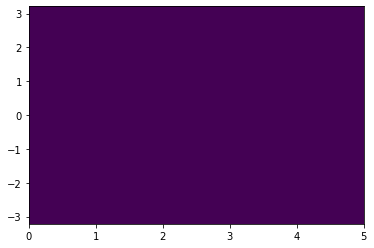

In [11]:
nbins = 500
if nPosts == 2:
    r = [[0,post0_x],[post0_y,post1_y]]
else:
    r = [[0,post1_x],[post0_y,post2_y]]
h,xedge,yedge,image = plt.hist2d(xs,ys, bins=nbins, normed=True, range=r)

if nPosts == 2:
    img = np.flipud(np.rot90(cv2.GaussianBlur(h,(201,201),0)))
else:
    img = np.flipud(np.rot90(cv2.GaussianBlur(h,(101,101),0)))

In [12]:
for i in range(0,nbins):
    max_val = np.max(img[:,i])
    img[:,i] = img[:,i]/max_val

In [13]:
xs=[]
ys=[]
import scipy.signal
for i in range(1,nbins):
    a = scipy.signal.find_peaks(img[:,i], height=0.95)[0]
    for j in range(0,len(a)):
        if nPosts == 2:
            xs.append(i*post0_x/nbins)
            ys.append(a[j]*(post0_y-post1_y)/nbins + post1_y)
        else:
            xs.append(i*post1_x/nbins)
            ys.append(a[j]*(post0_y-post2_y)/nbins + post2_y)

In [14]:
def get_duplicates(x): 
    _size = len(x) 
    repeated = [] 
    for i in range(_size): 
        k = i + 1
        for j in range(k, _size): 
            if x[i] == x[j] and x[i] not in repeated: 
                repeated.append(x[i]) 
    return repeated 

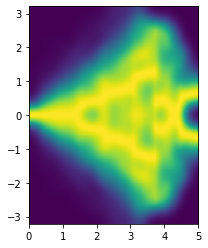

In [15]:
bifurcation_x = np.min(np.where(xs == np.min(get_duplicates(xs))))-1

if nPosts == 2:
    mf.pb.plt.imshow(img, extent=[0,post0_x,post0_y,post1_y])
else:
    mf.pb.plt.imshow(img, extent=[0,post1_x,post0_y,post2_y])
#mf.pb.plt.scatter(xs,ys, s=1, c='black')
#mf.pb.plt.vlines(post0_x*bifurcation_x/nbins, ymin=post0_y, ymax=post1_y, color='white', linestyles='dashed')
    
mf.pb.plt.savefig('/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/' + str(nPosts) + '_post_bifurcation_tracks.png', format='png', dpi=300)

In [16]:
bifurcation_pt = post0_x*bifurcation_x/nbins,ys[bifurcation_x]

vec0 = post0_x-bifurcation_pt[0], post0_y-bifurcation_pt[1]
vec1 = post1_x-bifurcation_pt[0], post1_y-bifurcation_pt[1]

vec0 = vec0 / np.linalg.norm(vec0)
vec1 = vec1 / np.linalg.norm(vec1)

In [17]:
np.arccos(vec0.dot(vec1))*180/np.pi

49.36834110543961

In [18]:
app_ang = np.squeeze(-2*np.arctan2(np.unique(all_experiments.get((0,1,0,0,1)).var['x'][:,1])[0], 
                              np.unique(all_experiments.get((0,1,0,0,1)).var['x'][:,0])[0] - all_experiments.get((0,1,)).metaFish['x'][:,0]))
direc = np.squeeze(all_experiments.get((0,1,)).metaFish['vr'][:,1])

/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  


ValueError: range argument must have one entry per dimension

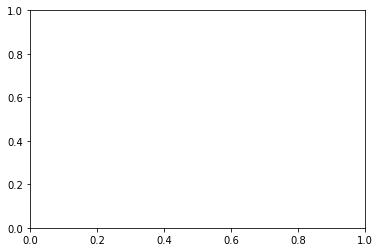

In [19]:
nbins = 500
h,xedge,yedge,image = plt.hist2d(app_ang,direc, bins=nbins, normed=True, range=[[np.pi/3,np.pi],[-np.pi,np.pi]])
img = np.flipud(np.rot90(cv2.GaussianBlur(h,(201,101),0)))

In [ ]:
for i in range(0,nbins):
    max_val = np.max(img[:,i])
    img[:,i] = img[:,i]/max_val

In [ ]:
angs=[]
dirs=[]
import scipy.signal
for i in range(1,nbins-1):
    a = scipy.signal.find_peaks(img[:,i], height=0.1)[0]
    for j in range(0,len(a)):
        angs.append(i*(180-60)/nbins + 60)
        dirs.append(-a[j]*2*180/nbins + 180)

In [ ]:
bifurcation_x = np.min(np.where(angs == np.min(get_duplicates(angs))))-1

mf.pb.plt.imshow(img, extent=[60,180,-180,180], aspect=0.4)
mf.pb.plt.xticks([60,90,120,150,180])
mf.pb.plt.xlabel('Angular disagreement (degrees)')
mf.pb.plt.ylabel('Direction (degrees)')
#mf.pb.plt.savefig('/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/' + str(nPosts) + '_post_bifurcation_angles.png', format='png', dpi=300)